In [29]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [61]:
train = pd.read_csv('train.csv')
print(train.shape)
train

(1095, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140
1,757,60,RL,68.0,10769,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,212000
2,632,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,209500
3,1193,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,125000
4,773,80,RL,94.0,7819,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Abnorml,107000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1361,70,RL,51.0,9842,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,189000
1091,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
1092,382,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,187750
1093,1414,20,RL,88.0,10994,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,COD,Abnorml,257000


## 取出連續型特徵 (方便降維)

In [62]:
continual = [f for f in train.columns if train.dtypes[f] != 'object']
continual.remove('SalePrice')
continual.remove('Id')
print(f'continual: {len(continual)}')

continual: 36


## 分析缺失值

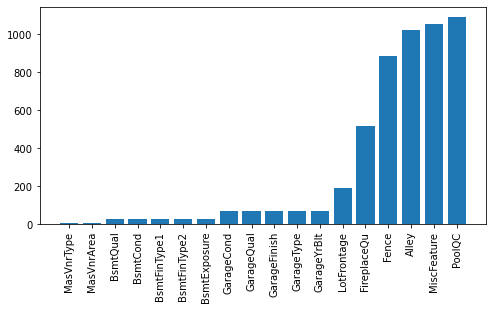

In [63]:
missing = train.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True)

plt.figure(figsize = (8, 4))
plt.bar(list(missing.index), np.array(missing))
plt.xticks(rotation='vertical')
plt.show()

## 去除缺失值

In [64]:
missing
# train = train.drop(missing)
# train

MasVnrType         7
MasVnrArea         7
BsmtQual          28
BsmtCond          28
BsmtFinType1      28
BsmtFinType2      29
BsmtExposure      29
GarageCond        67
GarageQual        67
GarageFinish      67
GarageType        67
GarageYrBlt       67
LotFrontage      191
FireplaceQu      517
Fence            888
Alley           1025
MiscFeature     1054
PoolQC          1091
dtype: int64

## 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [52]:
X=np.array(train.drop(columns=['SalePrice']))
X=(X-X.mean(axis=0))/X.std(axis=0)

Y=np.array(train['SalePrice'])
Y=pd.qcut(y, 4, labels=False)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

## 利用 TSNE 降維

In [ ]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
X_tsne = tsne.fit_transform(X)

## 做圖

In [ ]:
feature = 'LotFrontage'
plt.scatter(X, Y)
plt.xlabel(feature)
plt.ylabel(y_label)
plt.show()

## 1. 請問同學從降維後的圖表中可以看出什麼現象？

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？